<h1> <font color="blue"> <center> GIS Application in Civil Engineering</h1>
<h1> <font color="Red"> <center> Abdul Rehman</h1>

<hr>

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import os

In [5]:
path= '/home/fortbend/Lajuk/Data'
os.chdir(path)

In [6]:
ftexas = 'County_Boundaries.shp'
fwells = 'TWDB_Groundwater.shp'
froads = 'tl_2019_48_prisecroads.shp'
texas = gpd.read_file(ftexas)
wells = gpd.read_file(fwells)
roads = gpd.read_file(froads)

In [7]:
crsp = 'epsg:3083'
texasp = texas.to_crs(crsp)
wellsp = wells.to_crs(crsp)
roadsp = roads.to_crs(crsp)


Text(0.5, 1.0, 'Major Roads and Wells in Texas')

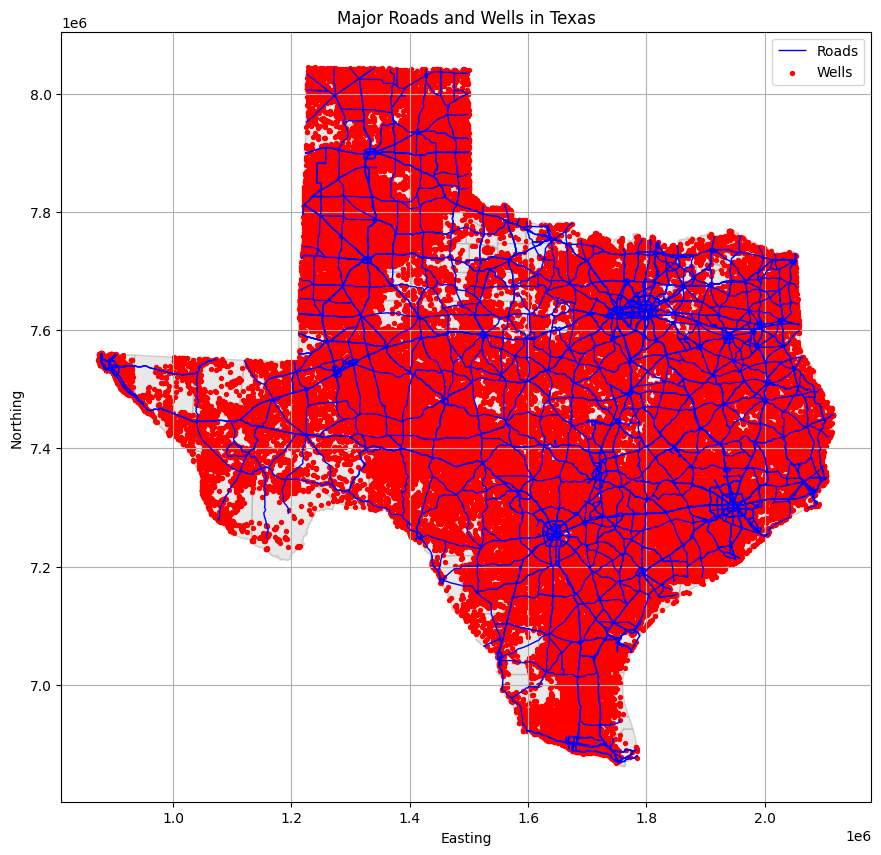

In [8]:
fig,ax = plt.subplots(figsize=(12,10))
texasp.plot(ax=ax,color='lightgrey',edgecolor='darkgrey',alpha=0.5)
roadsp.plot(ax=ax,color='blue',linewidth=1,label='Roads')
wellsp.plot(ax=ax,color='red', markersize=8,label='Wells')
plt.grid()
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend()
plt.title('Major Roads and Wells in Texas')

In [9]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548580.758 7218735.914, 1548467.973..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.121 7283199.932, 1803003.936..."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.13 7285025.412, 1955941.887 ..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.327 7285703.717, 1869702.023..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557003.638 7228370.703, 1556999.535..."


In [10]:
texasp['AreaSQMI'] = texasp.area*(0.000621371**2)

In [11]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,AreaSQMI
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548580.758 7218735.914, 1548467.973...",1564.692024
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.121 7283199.932, 1803003.936...",971.074192
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.13 7285025.412, 1955941.887 ...",1486.243306
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.327 7285703.717, 1869702.023...",1094.345787
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557003.638 7228370.703, 1556999.535...",1339.617299


In [12]:
type(texasp)

geopandas.geodataframe.GeoDataFrame

In [13]:
len(texasp)

254

In [14]:
area = np.sum(texasp.AreaSQMI)

<h5> "Dissolve the Counties in Texas"

In [15]:
texasd= texasp.dissolve() # Requires() as it is a method

<function matplotlib.pyplot.show(close=None, block=None)>

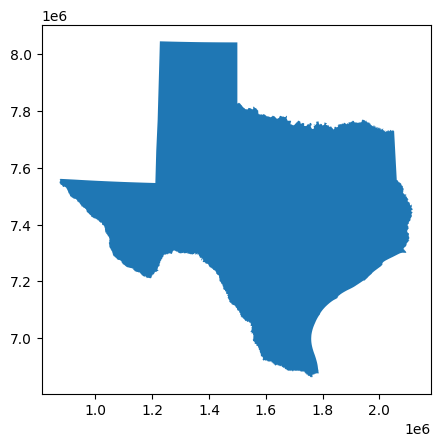

In [16]:
texasd.plot()
plt.show

In [17]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276003.877 7307501.635, 1276010.379...",232,232,48463,232,15,Uvalde,232,15,35,1564.692024


texasd.columns

In [18]:
#texasd = texasd.drop(columns=["AreaSQMI"])

In [19]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276003.877 7307501.635, 1276010.379...",232,232,48463,232,15,Uvalde,232,15,35,1564.692024


In [20]:
texasd["AreaSQMI"] = texasd.area*np.power(0.0006213712,2)

In [21]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276003.877 7307501.635, 1276010.379...",232,232,48463,232,15,Uvalde,232,15,35,267232.426252


In [22]:
roadsp['LengthMI'] = roadsp.length*0.0006213712
roadsp.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,LengthMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"LINESTRING (1791293.798 7623070.326, 1791122.4...",0.220021
1,1102671599582,S Walton Walker Rmp,M,S1200,"LINESTRING (1791294.231 7623081.564, 1791073.7...",0.221517
2,110449721117,West S Lp,M,S1200,"LINESTRING (1668852.254 7566582.529, 1668869.5...",0.624275
3,110449719101,W S Lp,M,S1200,"LINESTRING (1668373.606 7566294.178, 1668459.8...",0.347292
4,1106039033336,E S Lp,M,S1200,"LINESTRING (1669708.783 7567107.535, 1669779.6...",1.388956


In [23]:
np.sum(roadsp.LengthMI)

63284.38092393685

<h6> Approximate Road Area in Texas  HIghways

In [24]:
width = 35 
# Road occupies 75 Metre in total for buffer its half
roadsb = roadsp.copy()
roadsb['geometry'] = roadsb.geometry.buffer(width)

In [25]:
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,LengthMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",0.220021
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",0.221517
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",0.624275
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",0.347292
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",1.388956


In [26]:
roadsb['AreaSQMI'] = roadsb.area*np.power(0.0006213712,2)

In [27]:
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,LengthMI,AreaSQMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",0.220021,0.011053
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",0.221517,0.011118
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",0.624275,0.028637
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",0.347292,0.016589
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",1.388956,0.061897


In [28]:
sum(roadsb.AreaSQMI)

2764.9544684027273

<h7> FInd the roads length per County (Spatial Join)

In [29]:
roadscty= gpd.overlay(roadsp,texasp,how='intersection')

In [30]:
roadscty.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'LengthMI', 'CMPTRL_CNT',
       'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST', 'CNTY_NM',
       'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'geometry'],
      dtype='object')

In [31]:
roadsctyg= roadscty.groupby('CNTY_NM')['LengthMI'].sum().reset_index()

In [32]:
roadsctyg.head()

,CNTY_NM,LengthMI
0,Anderson,332.251680
1,Andrews,565.221778
2,Angelina,366.663162
3,Aransas,100.591255
4,Archer,322.382896


In [33]:
roadsctyg.sort_values(by='LengthMI', ascending=False)

,CNTY_NM,LengthMI
100,Harris,2861.070723
56,Dallas,2023.644947
219,Tarrant,1775.085937
14,Bexar,1530.842074
69,El Paso,938.478005
...,...,...
31,Camp,55.584974
196,Roberts,53.965410
212,Somervell,53.032941
16,Borden,48.887280


In [34]:
roadsctyg.loc[(roadsctyg)['CNTY_NM']=='Jefferson']

,CNTY_NM,LengthMI
122,Jefferson,709.982566


In [35]:
len(roadsctyg) # Lenghth for no of rows

254

In [36]:
type(roadsctyg)   # Type 

pandas.core.frame.DataFrame

In [37]:
texasp = texasp.merge(roadsctyg,on='CNTY_NM')

In [38]:
texasp.columns

Index(['CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST',
       'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'geometry', 'AreaSQMI',
       'LengthMI'],
      dtype='object')

In [39]:
texasp['RDdensity'] = texasp.LengthMI/texasp.AreaSQMI # Reciprocal of lenghth

In [40]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,AreaSQMI,LengthMI,RDdensity
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548580.758 7218735.914, 1548467.973...",1564.692024,216.030887,0.138066
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.121 7283199.932, 1803003.936...",971.074192,306.607246,0.315740
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.13 7285025.412, 1955941.887 ...",1486.243306,632.516688,0.425581
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.327 7285703.717, 1869702.023...",1094.345787,307.706844,0.281179
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557003.638 7228370.703, 1556999.535...",1339.617299,332.320930,0.248072


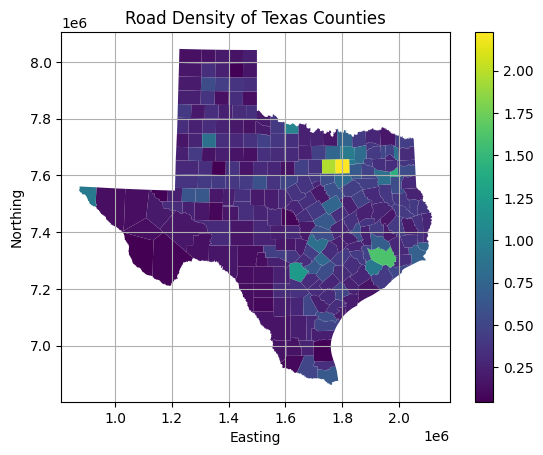

In [41]:
texasp.plot(column='RDdensity', legend = True)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid()
plt.title('Road Density of Texas Counties')
plt.show()

In [42]:
texasp.columns

Index(['CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST',
       'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'geometry', 'AreaSQMI',
       'LengthMI', 'RDdensity'],
      dtype='object')

<h7> Distance to Nearest Highway from a Well in Jefferson County

In [43]:
Jeffersoncty = texasp.loc[texasp['CNTY_NM']=='Jefferson']

In [44]:
Jeffersoncty.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,AreaSQMI,LengthMI,RDdensity
24,123,123,48245,124,20,Jefferson,124,20,59,"POLYGON ((2058305.642 7355084.718, 2058317.791...",994.080317,709.982566,0.71421


In [45]:
roadsp.columns


Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry', 'LengthMI'], dtype='object')

In [46]:
wellsp.columns

Index(['StateWellN', 'OwnerName', 'PrimaryWat', 'Elevation', 'WellDepth',
       'WaterLevel', 'WaterQuali', 'AquiferCod', 'CoordDDLat', 'CoordDDLon',
       'CountyName', 'WellType', 'geometry'],
      dtype='object')

In [47]:
ctyrds = gpd.sjoin(
    roadsp , Jeffersoncty,
    how = "inner", # road info foe only those roads that intersets
    predicate= "intersects")

In [48]:
ctyrds.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry', 'LengthMI_left',
       'index_right', 'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY',
       'TXDOT_DIST', 'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI',
       'LengthMI_right', 'RDdensity'],
      dtype='object')

In [49]:
ctyrds = ctyrds.drop(columns=['index_right'])

In [50]:
ctyrds.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry', 'LengthMI_left',
       'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST',
       'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'LengthMI_right',
       'RDdensity'],
      dtype='object')

<Axes: >

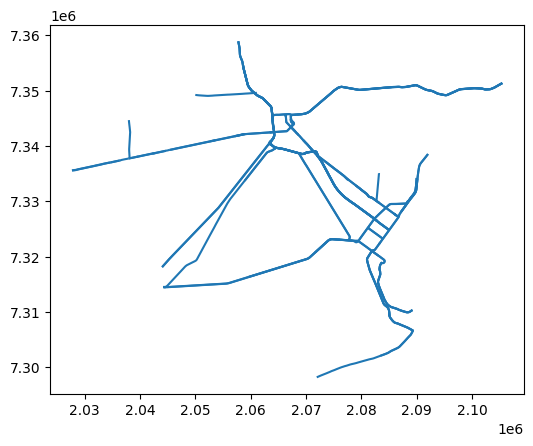

In [51]:
ctyrds.plot()

In [52]:
ctywells = gpd.sjoin(
    wellsp , Jeffersoncty,
    how = "inner", # road info foe only those roads that intersets
    predicate= "within")

In [53]:
ctywells.columns

Index(['StateWellN', 'OwnerName', 'PrimaryWat', 'Elevation', 'WellDepth',
       'WaterLevel', 'WaterQuali', 'AquiferCod', 'CoordDDLat', 'CoordDDLon',
       'CountyName', 'WellType', 'geometry', 'index_right', 'CMPTRL_CNT',
       'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST', 'CNTY_NM',
       'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'LengthMI', 'RDdensity'],
      dtype='object')

In [54]:
ctyrds.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry', 'LengthMI_left',
       'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST',
       'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'LengthMI_right',
       'RDdensity'],
      dtype='object')

In [55]:
ctywells = ctywells.drop(columns=['index_right', 'CountyName'])

In [56]:
ctywells.columns

Index(['StateWellN', 'OwnerName', 'PrimaryWat', 'Elevation', 'WellDepth',
       'WaterLevel', 'WaterQuali', 'AquiferCod', 'CoordDDLat', 'CoordDDLon',
       'WellType', 'geometry', 'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN',
       'TXDOT_CNTY', 'TXDOT_DIST', 'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID',
       'AreaSQMI', 'LengthMI', 'RDdensity'],
      dtype='object')

<Axes: >

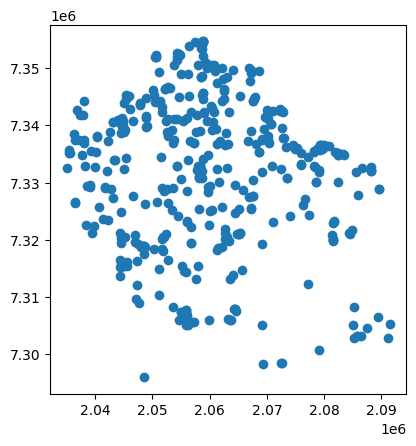

In [57]:
ctywells.plot()

In [58]:
ctywells.columns


Index(['StateWellN', 'OwnerName', 'PrimaryWat', 'Elevation', 'WellDepth',
       'WaterLevel', 'WaterQuali', 'AquiferCod', 'CoordDDLat', 'CoordDDLon',
       'WellType', 'geometry', 'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN',
       'TXDOT_CNTY', 'TXDOT_DIST', 'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID',
       'AreaSQMI', 'LengthMI', 'RDdensity'],
      dtype='object')

In [59]:
#Spatial Join:  find nearest line to each point
wellrdnear = gpd.sjoin_nearest(
    ctywells,ctyrds,
    how = "left", # keep all points
    distance_col="neardist" #new column with distance
)

In [60]:
wellrdnear.head()

,StateWellN,OwnerName,PrimaryWat,Elevation,WellDepth,WaterLevel,WaterQuali,AquiferCod,CoordDDLat,CoordDDLon,...,TXDOT_CNTY_right,TXDOT_DIST_right,CNTY_NM_right,CNTY_NBR_right,DIST_NBR_right,GID_right,AreaSQMI_right,LengthMI_right,RDdensity_right,neardist
102269,6154901,C. E. Lowry,Domestic,30,21.0,Miscellaneous Measurements,Y,"112CHCTU - Chicot Aquifer, Upper",30.134722,-94.266112,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,107.589357
102270,6154902,Bevil Oaks MUD,Public Supply,28,450.0,TWDB Current Site Visit,Y,"112CHCTL - Chicot Aquifer, Lower",30.159167,-94.271111,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,2733.290725
102271,6154903,Bevil Oaks M.U.D.,Public Supply,26,550.0,None,Y,"112CHCTL - Chicot Aquifer, Lower",30.159445,-94.271111,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,2763.769050
102272,6154904,Marilyann Mills,Stock,27,530.0,TWDB Current Site Visit,N,"112CHCTL - Chicot Aquifer, Lower",30.161667,-94.270278,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,3020.434668
102273,6154905,Bevil Oaks M.U.D. Well #3,Public Supply,26,572.0,Historical,Y,"112CHCTL - Chicot Aquifer, Lower",30.159167,-94.271389,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,2728.862721


In [61]:
#Sort Wells by nearest road distance (ascending)
wellrdnear_sorted = wellrdnear.sort_values(by="neardist", ascending=True)

In [62]:
wellrdnear.head()

,StateWellN,OwnerName,PrimaryWat,Elevation,WellDepth,WaterLevel,WaterQuali,AquiferCod,CoordDDLat,CoordDDLon,...,TXDOT_CNTY_right,TXDOT_DIST_right,CNTY_NM_right,CNTY_NBR_right,DIST_NBR_right,GID_right,AreaSQMI_right,LengthMI_right,RDdensity_right,neardist
102269,6154901,C. E. Lowry,Domestic,30,21.0,Miscellaneous Measurements,Y,"112CHCTU - Chicot Aquifer, Upper",30.134722,-94.266112,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,107.589357
102270,6154902,Bevil Oaks MUD,Public Supply,28,450.0,TWDB Current Site Visit,Y,"112CHCTL - Chicot Aquifer, Lower",30.159167,-94.271111,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,2733.290725
102271,6154903,Bevil Oaks M.U.D.,Public Supply,26,550.0,None,Y,"112CHCTL - Chicot Aquifer, Lower",30.159445,-94.271111,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,2763.769050
102272,6154904,Marilyann Mills,Stock,27,530.0,TWDB Current Site Visit,N,"112CHCTL - Chicot Aquifer, Lower",30.161667,-94.270278,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,3020.434668
102273,6154905,Bevil Oaks M.U.D. Well #3,Public Supply,26,572.0,Historical,Y,"112CHCTL - Chicot Aquifer, Lower",30.159167,-94.271389,...,124,20,Jefferson,124,20,59,994.080317,709.982566,0.71421,2728.862721


<Axes: >

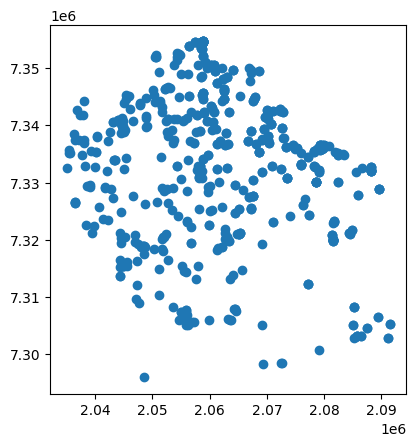

In [63]:
wellrdnear_sorted.plot()

<h9> Wells in each county


In [64]:
wellcty = gpd.sjoin(wellsp,texasp,how='inner',predicate='within')
wellcty.columns

Index(['StateWellN', 'OwnerName', 'PrimaryWat', 'Elevation', 'WellDepth',
       'WaterLevel', 'WaterQuali', 'AquiferCod', 'CoordDDLat', 'CoordDDLon',
       'CountyName', 'WellType', 'geometry', 'index_right', 'CMPTRL_CNT',
       'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST', 'CNTY_NM',
       'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'LengthMI', 'RDdensity'],
      dtype='object')

In [65]:
wellcount = wellcty.groupby("CNTY_NM").agg(Wellsct = ("StateWellN","count")).reset_index()

In [66]:
wellcount.head()

,CNTY_NM,Wellsct
0,Anderson,502
1,Andrews,287
2,Angelina,385
3,Aransas,269
4,Archer,223


In [67]:
wellcty = wellcty.merge(wellcount,on='CNTY_NM')

In [68]:
texasz= texasp.merge(wellcount,on='CNTY_NM')

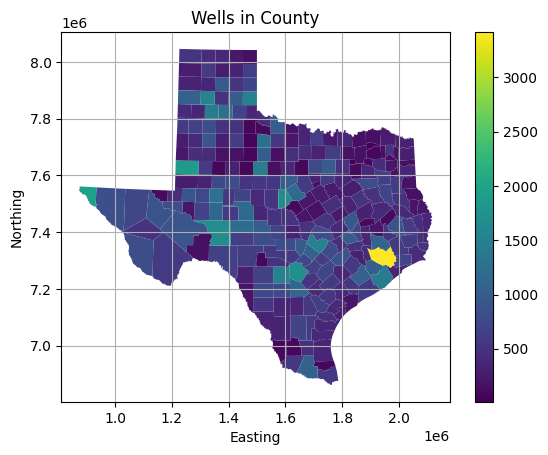

In [69]:
texasz.plot(column='Wellsct', legend =True)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.grid()
plt.title('Wells in County')
plt.show()

In [70]:
wellcount.sort_values(by= 'Wellsct', ascending=False)

,CNTY_NM,Wellsct
100,Harris,3418
69,El Paso,1940
82,Gaines,1866
14,Bexar,1699
24,Brown,1669
...,...,...
75,Fisher,66
50,Cottle,59
134,King,54
60,Delta,30
